<a href="https://colab.research.google.com/github/hongwon2/HG-MLDL/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_RNN%EC%9C%BC%EB%A1%9C_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0_%EA%B3%B5%EB%B6%80_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 이미지 분류 - RNN으로 손글씨 이미지 분류하기
--------------
## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## 데이터 소개  
    - 이번 주제의 데이터는 너무나 유명한 MNIST 데이터를 사용합니다.
  ![mnist 이미지](https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png)

      위의 이미지는 다음과 같은 것을 보여줍니다.  
      (a) 28x28의 배열에서 3이 어떻게 모사되는지   
      (b) 각 0-9까지의 다양한 그림의 모습들


- 데이터 출처: [MNIST](http://yann.lecun.com/exdb/mnist/)


## 최종 목표

    - 이전에 배웠던 MNIST fully-conntect network과 CNN classificaion외 RNN식 접근을 배워본다.  
    - 또한, data augmentation 기법의 기초가 될 수 있는 이미지에 noisy와 같은 변형을 줄 수 있는 방법을 알아본다.
    - 이미지에 대한 RNN 접근 방법을 배울 수 있습니다.


---


In [1]:
import tensorflow as tf  # 텐서플로우 볼러와
from tensorflow import keras # 텐서플로우에서 케라스 블러와
from keras.layers import Dense #케라스.layers 에서 dense(학습 층) 함수 불러와
from keras.models import Sequential #케라스.model 에서 시퀀셜 함수 불러와

import pandas as pd  # 판다스 불러오셈
import numpy as np #넘파이도
import matplotlib.pyplot as plt # 시각화 기본 패키지임
import seaborn as sns # 시각화 고급 패키지임 - 이거 이름 시험에 나올수도
import warnings #경고 표시 패키지 인데 신경 안써도 됨
from IPython.display import Image #파이썬에서 이미지를 표시하기 위해 설치하는 라이브러리 

warnings.filterwarnings('ignore') #경고 표시 무시하기
%matplotlib inline 

SEED = 34 #무시하셈

## Step 1. 도입전 기본 처리

### 문제 1. mnist 데이터 살펴보기

In [2]:
# 데이터를 불러오는 코드를 작성해주세요.
mnist = keras.datasets.mnist #숫자 분류 데이터 셋 이름 : mnist - 중요
((train_images, train_labels) , (test_images, test_labels)) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 문제 2. 데이터의 shape을 출력해보세요.

In [3]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
print(f"train_images: {train_images.shape}") #6만장 , 가로 28픽셀 , 세로 28픽셀인 손글씨 숫자 사진
print(f"train_labels: {train_labels.shape}") #6만장, 0~ 9 까지의 숫자 라벨

print(f"test__images: {test_images.shape}") 
print(f"test_labels: {test_labels.shape}")
## print(f {}) 하는 이유는 f 를 써야 {} 안에 변수를 출력할 수 있음

train_images: (60000, 28, 28)
train_labels: (60000,)
test__images: (10000, 28, 28)
test_labels: (10000,)


### 문제 3. (28, 28) 형태의 이미지를 plt을 이용하여 출력해보세요.

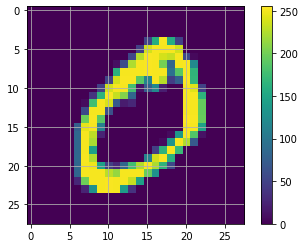

0


In [4]:
# 28x28의 흑백 이미지를 plt를 이용하여 출력하는 코드를 작성해보세요.
plt.figure() # plt.figure :이미지 그릴게 빈 종이 구해놔 
plt.imshow(train_images[1]) # plt.imshow : 이미지 그려
plt.colorbar()  #그래프 옆에 긴 막대기
plt.grid(True) #그래프 안에 격자무늬 그리드
plt.show() # 다했다 보여줘


print(train_labels[1]) #이건 그래프 밑에있는 숫자의 정답지 '0' 을 뜻함

# 아래 그림 '0' 에서 그려진 부분은 진하기에 따라 0~255 의 데이터 값을 가짐
# 컴퓨터는 이 숫자의 값, 위치를 보고 이 숫자가 어떤 숫자인지 학습함 

In [5]:
#이해를 돕기위해 내가 만들었음 - 0 모양 데이터 값 확인

for i in train_images[1] : #train_images[' ']안의 값을 바꾸면서 숫자 확인해 (0 ~ 59999) 까지 가능
    for j in i:
        print(j,end=" ")
    print()

#가로 28 , 세로 28 이런게 6만장 있다 


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 51 159 253 159 50 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 48 238 252 252 252 237 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 54 227 253 252 239 233 252 57 6 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 10 60 224 252 253 252 202 84 252 253 122 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 163 252 252 252 253 252 252 96 189 253 167 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 51 238 253 253 190 114 253 228 47 79 255 168 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 48 238 252 252 179 12 75 121 21 0 0 253 243 50 0 0 0 0 0 
0 0 0 0 0 0 0 0 38 165 253 233 208 84 0 0 0 0 0 0 253 252 165 0 0 0 0 0 
0 0 0 0 0 0 0 7 178 252 240 71 19 28 0 0 0 0 0 0 253 252 195 0 0 0 0 0 
0 0 0 0 0 0 0 57 252 252 63 0 0 0 0 0 0 0 0 0 253 252 195 0 0 0 0 0 
0 0 0 0 0 0 0 198 253 190 0 0 0 0 0 0 0 0 0 0 

### 문제 4. train_images에서 0이 아닌 값들을 출력해보세요.

In [6]:
# 하나의 이미지에 대한 모든 0이 아닌 값을 출력하는 코드를 작성하세요. ##이미지내에서 빈공간(0) 이 아닌 색칠된 곳의 색깔값을 표현하시오
list(filter(lambda x: x != 0, train_images[1].reshape(-1)))[:11] 
# reshape(-1)을 하는 이유 : 데이터 값이 몇개가 있든 알아서 한줄짜리 열로 세워
# lambda 란? - 빠르게 함수 (def :) 를 만들어 주는 역할을 함 
# filter : lambda 함수로 값을 걸러
# list : 리스트에 넣어

#결과 = 위에 '0'에서 제일 위에 숫자 두줄... 귀여움

[51, 159, 253, 159, 50, 48, 238, 252, 252, 252, 237]

### 문제 5. train_images의 dtype을 출력해보세요.

In [7]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.
print(train_images.dtype) # .dtype : 넘파이 배열의 데이터 타입을 알려줘
print(train_labels.dtype) # uint8 - 정수형(0 ~ 255) ## int8 - 정수형(-128 ~ 127)  다름  #그래도 정수형인건 같다.
print(test_images.dtype)
print(test_labels.dtype)

uint8
uint8
uint8
uint8


## Step 2. 전처리

### 문제 6. train/test 이미지 데이터의 범위 확인

In [8]:
# test_images의 shape과 dtype, 0이 아닌 숫자를 출력하는 코드를 작성하세요.
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


### 문제 7. train/test 이미지 데이터의 최소/최대값을 출력

In [9]:
# train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)) ) #max는 당연히 255(가장 진한 값), min은 당연히 0 (색칠 안된 부분)
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)) )

255 0
255 0


### 문제 8. 정수형을 실수형으로 변경 후 dtype으로 비교

In [10]:
# train/test 데이터의 타입을 dtype으로 확인해보고 실수형으로 전환하는 코드를 작성하세요.
test_images = test_images.astype(np.float64) # .astype 함수를 사용해서 아까 확인한 dtype(uint8 :정수형)을 dtype(float64 : 실수형) 으로 변경 
train_images = train_images.astype(np.float64) ##데이터 형식만 바뀐거지 값이 바뀐건 아님 ex 값 123(정수형) -> 123.0(실수형)으로 바뀐것

### 문제 9. 데이터 0-1 노말라이즈 수행


#### 힌트

일반적으로 0-1사의의 값을 가지게 하기 위해서는 다음 수식을 사용합니다.

$$normalize(x) = \frac{x - 최소값}{최대값 - 최소값}$$

이 경우 최소값이 0이기 떄문에 다음과 같이 간편하게 구할 수 있습니다.

$$normalize(x) = \frac{x}{최대값}$$

In [11]:
# images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.
train_images = train_images / 255 # 색깔값 0~255 이었던 색깔값을 0~1 사이의 값으로 변경시켜주는 작업
test_images = test_images / 255 ## 0~255 만큼의 거리가 0~1 사이로 좁혀지면, 컴퓨터가 학습하기 편하기 때문에 해주는 작업

### 문제 10. 0-1 노말라이즈 후 데이터의 값이 변경되었는지 문제 6, 7의 방법을 이용하여 확인하세요.

노말라이즈가 제대로 됐는지 확안해 보겠습니다.

In [12]:
# 노말라이즈 후 min/max, shape, 0이 아닌 값, dtype 등을 확인하는 코드를 작성해보세요. 
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, train_labels.reshape(-1)))[:10]) #라벨은 정규화 해주면 안됨 데이터 값이 아니라 정답지기 때문에 0~9의 값을 당연히 그대로 유지해야함
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_labels.reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [13]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape) #shape :행렬의 '구조(차원)' 을 보여주세요 ##(6만장, 가로 28, 세로 28  )
print(train_images.dtype, train_labels.dtype, test_images.dtype, test_labels.dtype) #dtype : 행렬의 '타입'을 보여주세요 ## 데이터 값 : float64로 변경됨, 라벨 타입은 그래도 uint8

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
float64 uint8 float64 uint8


In [14]:
#정수가 0~1 사이 실수값이 되어서 그림이 찌그러져 보이지만 '0' 모양임 
for i in train_images[1] : #트레인 이미지의 첫번째 그림
    for j in i:
        print(j,end=" ")
    print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.6235294117647059 0.9921568627450981 0.6235294117647059 0.19607843137254902 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.18823529411764706 0.9333333333333333 0.9882352941176471 0.9882352941176471 0.9882352941176471 0.9294117647058824 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.21176470588235294 0.8901960784313725 0.9921568627450981 0.9882352941176471 0.9372549019607843 0.9137254901960784 0.9

## Step 3. 시각화 방법

### 문제 11. train_image의 이미지를 5장 획득하여 (5, 28, 28)의 shape을 출력하세요.

In [15]:
# (60000, 28, 28)인 train_images에서 (5, 28, 28)을 획득하는 코드를 작성하세요.
train_images[:5].shape

(5, 28, 28)

In [16]:
train_images[:5].shape

(5, 28, 28)

### 문제 12. 획득한 5장의 의미지를 (28, 28 * 5)의 shape으로 변경해보세요.

In [17]:
# np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.
# 해당 기능을 쓰면 (height(이미지 장 수 : 5장의 높이), image_height(28 픽셀), image_width(28 픽셀))의 shape을 (image_height, image_width * height)으로 바꿔 줄 수 있습니다.
# 코드를 작성해보세요.
print(np.hstack(train_images[:5]).shape)


(28, 140)


In [18]:
# 이렇게 해주는 작업임 (내가 추가한 부분,원래 없으니까 참고하쇼)
a = np.hstack(train_images[:5])
print(a.shape)
for i in a :
  for j in i:
    print(j ,end = " ")
  print()

#각각 5장이었던 숫자들을 한장의 가로 방향으로 붙인다는 뜻 (5,28,28) -> (28,140)
#5,0,4,1,9
## 아무튼 시험엔 hstack의 뜻이랑 이름이 더 중요함  ### np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.

(28, 140)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0

### 문제 13. np.hstack은 tensorflow에서 제공하는 방법이 아니므로 transpose 함수를 이용하여 (28, 28 * 5)로 shape을 변경해보세요.

In [19]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1)

# 이거 이해하기 어렵다.. 그냥 hp.hstack은 공식적인 방법이 아니므로 같은 기능을 하는 transpose((1,0,2)).reshape(28,-1) 를 써야한다고 외우삼
## reshape의 -1 은 140을 뜻함

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 문제 14. (28, 140)이 된 tensor를 plt로 출력해보세요.

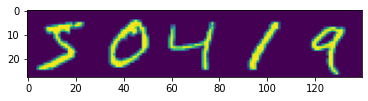

In [20]:
# (28, 140)의 이미지를 plt로 출력해보세요.
plt.imshow(train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1))
plt.show()

###문제 15. (28, 140)이 된 tensor를 plt로 흑백으로 출력해보세요. 또한, 해당되는 labels의 값도 print로 출력하세요.

hit: imshow 함수의 cmap ='gray' 옵션은 흑백이미지를 heatmap으로 출력하지 않습니다.

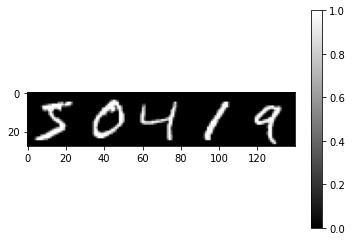

[5 0 4 1 9]


In [21]:
# images와 labels 5개를 출력하는 코드를 작성하세요.
plt.imshow(train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray") #imshow 의 cmap = 'gray' 를 사용하여 흑백으로 표현가능
plt.colorbar()
plt.show()
print(train_labels[:5])

## Step 4. Data augmentation - Noise 추가 방법

### 문제 16. np.random.random 함수를 이용하여 0-1 사이의 랜덤값을 3회 print로 출력해보시오.

In [22]:
# np.random.ranodm을 이용해서 0-1 사의의 랜덤값을 3회 출력하는 코드를 작성하시오.
print(np.random.random()) #랜덤값을 보여주는 함수
print(np.random.random())
print(np.random.random())

#내가 만든것(원래 없음) - 두개 출력하기
print(np.random.random(2))

0.5499162400143941
0.17847273631688787
0.7194911136626176
[0.01036999 0.4645306 ]


### 문제 17. np.random.random 함수와 shape 파라매터를 (28, 28)의 랜덤 노이즈를 생성해보세요.

In [23]:
# np.random.randpm 함수와 shape 파라매터를 이용하여 (28, 28)의 랜덤 노이즈를 생성하는 코드를 작성하시오.
np.random.random((28,28)).shape

(28, 28)

In [24]:
#이해를 돕기 위해 내가 만든 부분(원래 없음)
rd = np.random.random((28,28)) #28,28 을 출력하기 위해 넣어줌
for i in rd:
  for j in i:
    print(j,end =' ')
  print()

#양수값임

0.36614874015968446 0.3156263757544092 0.7120215515436927 0.2550733663504251 0.19312853576406264 0.9940537152746257 0.052914255077981975 0.26132341025493067 0.3496818547543503 0.9938984362113185 0.10154319060517059 0.5014983045447785 0.046649404719102394 0.2825265023954622 0.6263244088612274 0.45817392185665473 0.21851765891337815 0.79453891636111 0.8432949774173448 0.8907375179815652 0.4058168999349582 0.9613001628403577 0.8867055006447081 0.4374525413945024 0.8050522593664192 0.23036737755355663 0.6651606160237075 0.20075483978440756 
0.37694697070781646 0.774982594858783 0.6027002081978348 0.8031198999258172 0.5615478783656698 0.3801137287996932 0.28109040758930526 0.2148367879869808 0.35699667695076076 0.8516100629421145 0.9070718224163143 0.2572259371002227 0.4637253980942946 0.2020037465537423 0.9767429679143415 0.4698618531433587 0.08505184883079231 0.05502265720912969 0.5316822575217908 0.01758684149317491 0.5043315927901931 0.03165225356637702 0.21683013211490654 0.23694293285

### 문제 18. 생성된 random (28, 28) 노이즈를 plt를 통하여 확인해보세요.

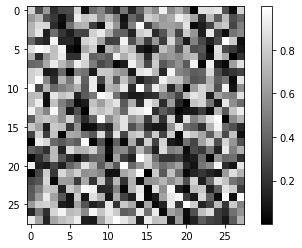

In [25]:
# plt를 통하여 random (28, 28) 노이즈를 2회 출력하는 코드를 작성하시고, 이미지가 다른지 확인하세요.
plt.imshow(np.random.random((28,28)), cmap="gray")
plt.colorbar()
plt.show()
# 원래 이미지의 경우 안그려진 부분은 0, 그려진 부분은 색깔값 이라서 숫자 모양이 만들어졌지만, 지금은 모양이 만들어지지 않은 모습 

### 문제 19. 가우시안 노이즈 함수를 사용하여 평균 0, 표준편차 0.1, 사이즈 1로 랜덤 값을 3번 출력하세요. (np.random.normal)

In [26]:
# 가우시안 노이즈 함수를 이용하여 mu 0.1 std 0.1 size 1인 랜덤값을 3번 출력하는 코드를 작성하세요.
print(np.random.normal(0.0, 0.1, 1))
print(np.random.normal(0.0, 0.1, 1))
print(np.random.normal(0.0, 0.1, 1))

[0.00529842]
[0.00165789]
[0.11319892]


### 문제 20. 가우시안 노이즈 함수의 옵션을 문제 19과 동일하지만 평균이 3.0인 경우, 표준 편차가 0.01인 경우로 각각 3회씩 출력해보세요.

In [27]:
# 가우시안 노이즈 함수 mu = 3.0, std = 0.1, size = 1을 3 회 출력, mu = 0.0, std = 0.01, size = 1을 3회 출력하는 코드를 작성해보세요.
print(np.random.normal(3.0, 0.01, 1)) #평균 3, 표준편차 0.01, 1개 값
print(np.random.normal(3.0, 0.01, 1))
print(np.random.normal(3.0, 0.01, 1))

# 내가 추가한것 - 2개가 출력됨
print(np.random.normal(3.0, 0.01, 2))

[2.9891398]
[2.98772789]
[3.00350564]
[3.00775558 2.99742251]


### 문제 21. 가우시안 노이즈 함수를 문제 19의 옵션으로 size를 (28, 28)로 생성 후 plt로 출력해보세요.

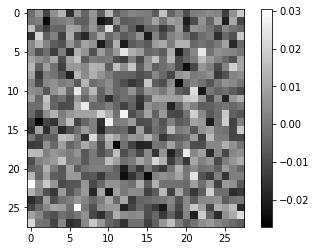

In [28]:
# 가우시안 노이즈 함수를 문제 17의 옵션으로 size를 (28, 28)로 생성 후 plt로 출력하는 코드를 작성해보세요. 단, std = 0.01
plt.imshow(np.random.normal(0.0, 0.01, (28, 28)), cmap="gray")
plt.colorbar()
plt.show()

### 문제 22. train_images의 5번째 이미지와 가우시안 노이즈 (28, 28)를 생성 한 뒤 각각 tensor를 더한 뒤 noisy_image 변수에 할당 해보세요.

In [29]:
# train_images[5]와 가우시안 노이즈 (28, 28)을 더한 뒤 noisy_image 변수에 할당하는 코드를 작성하세요. mu = 0.5, std = 0.1
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28, 28))

# 원래 깨끗했던 숫자 이미지에 (28,28) 모양의 노이즈를 더해서 흐릿하게 만들어줌
## 모델의 과적합을 막기위해 해줌(이정도면 2 맞으니까 2 로 판별해라 라는 느낌)

### 문제 23. noisy_image를 plt를 통해서 출력해보세요.

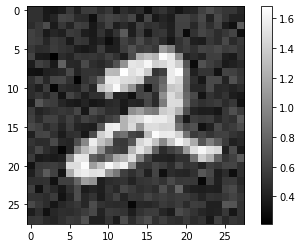

In [30]:
# noisy_image를 plt로 출력하는 코드를 작성해보세요.
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

### 문제 24. 노이지 이미지를 생성했지만, max가 1이 넘습니다. max값을 1로 조절해보세요.

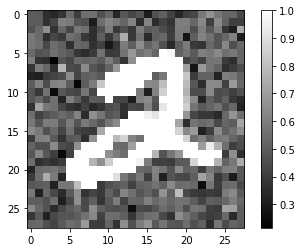

In [31]:
# max가 1을 초과하지 않게 noisy_image를 수정한 뒤 plt로 출력해보세요.
noisy_image[noisy_image > 1.0] = 1.0 # 이미지값중 1이 넘는 수 == 1 입니다. (1은 원래 255 였으니 검정색을 뜻함. 즉 일반 검정색보다 더 검정색인건 일반 검정색으로 바꿔라)
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

### 문제 25. 위의 방법을 전부 활용하여 train_images와 test_images 데이터에 랜덤 노이즈를 추가한 train_noisy_images와 test_noisy_images를 생성해보세요.

In [32]:
# train_noisy_image와 test_nosiy_images를 생성하는 코드를 작성하세요.
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape) #원래 트레인 셋에 노이즈 값을 추가
train_noisy_images[train_noisy_images > 1.0] = 1.0  #1이 넘는 값들은 1로 변경

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

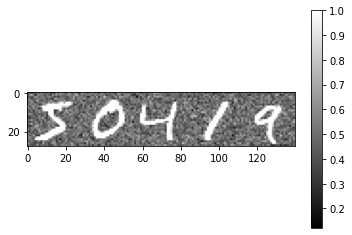

In [33]:
plt.imshow(train_noisy_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()

### 문제 26. labels에 onehot 인코딩을 적용하여 (배치 사이즈, 클래스 개수)의 shape으로 변경해보세요.

In [34]:
#원래 라벨
train_labels[2]

4

In [35]:
# train/test labels에 onehot encoding을 적용하여 shape을 (배치사이즈,) 에서 (배치사이즈, 클래스 개수)로 변경하는 코드를 작성하세요.
from keras.utils import to_categorical
print(train_labels.shape, test_labels.shape)
train_labels = to_categorical( train_labels, 10) #중요
test_labels = to_categorical( test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [36]:
#원 핫 인코딩 된 라벨 - to_categorical 함수!!
train_labels[2]
#4 를 뜻함

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## Step 5. 모델링

### 문제 27. 해당 학습셋을 처리하는 이미지 classification 모델을 작성하세요.

In [37]:
# input (28, 28), 64 unit의 simple RNN, 10 unit의 fully-conntect를 가진 모델을 작성하세요.
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape=(28, 28))
x1 = SimpleRNN(64, activation="tanh")(inputs) #학습층 tanh 활성화 함수를 사용한 모습
x2 = Dense(10, activation="softmax")(x1) # 0~9까지의 숫자를 분류해야 하므로 다중분류 - 다중 분류시에는 마지막 층에서 softmax 함수를 사용
model = Model(inputs, x2)

### 문제 28. 모델 요약 정보를 출력해보세요.

In [38]:
# 모델 요약 정보를 출력해보세요.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


### 문제 29. 27에서 만든 모델에 로스와 옵티마이저, 메트릭을 설정하세요.

In [39]:
# 만든 모델에 loss는 categorical_crossentropy, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"]) #다중 분류에는 손실함수로 categorical_crossentropy 를 사용

#모델 생성 완료. 이제 공부시킬 시간

### 문제 30. 만든 모델에 train_noisy_images를 학습시켜 보세요.

In [ ]:
# train_noisy_images를 학습시키고 5 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)
#공부 : 트레인 노이즈 셋
#평가 : 테스트 노이즈 셋과 비교
#에포크 : 5번 공부
#벌보스
#verbose = 학습 중 출력되는 문구를 설정합니다.
#- 0 : 아무 것도 출력하지 않습니다.
#- 1 : 훈련의 진행도를 보여주는 진행 막대와 정보를 보여줌.
#- 2 : 정보만 보여줌 진행도 보여주는 막대 안보여줌.

Epoch 1/5


### 문제 31. 학습 진행 사항을 plt으로 출력하세요.

In [ ]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

## Step 6. 결과 확인

### 문제 32. 완성된 모델에서 test_noisy_image를 1장 넣고 결과를 res 변수에 저정하세요.

In [ ]:
# 모델에 test_noisy_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.
res = model.predict( test_noisy_images[3:4] ) #한장만 알고싶을때 predict 함수 사용
print(res.shape)
print(res)
#0일 확률 99퍼,1일 확률 27퍼, 2일확률 29퍼 ,,, 로 이해하면 됨 ## 세부 값은 실행시킬 때 마다 변경 될 수 있으나 아마 0이 99퍼 대 인건 동일할듯

### 문제 33. test_noisy_images[0], test_images[0]를 width 방향으로 결합하여 plt로 출력하세요

In [ ]:
# test_noisy_images[0], test_images[0]를 width 방향으로 결합하여 (28, 28 * 2) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요.
plt.imshow(   np.concatenate([test_noisy_images[3], test_images[3]], axis=1) , cmap="gray") #np.concatenate 함수는 그림을 붙이는 역할을 함 - axis = 1 은 '가로로
plt.show()

#세로 예시(내가 만듦)
plt.imshow(   np.concatenate([test_noisy_images[3], test_images[3]], axis=0) , cmap="gray") #np.concatenate 함수는 그림을 붙이는 역할을 함 - axis = 0 은 '세로로 붙여라' 라는 뜻
plt.show()

### 문제 34. res와 test_labels[0]의 결과를 plt.bar로 확인하세요.

In [ ]:
# res와 test_labels[0]의 결과를 plt.bar로 확인하세요.
plt.bar(range(10), res[0], color='red') #range(10) 은 뭔가요? : 그래프 x축인 0~10을 뜻함
plt.bar(np.array(range(10)) + 0.35, test_labels[3]) #0.35 신경 쓸 필요 없음- 그냥 원래대로 하면 x축 숫자10이 없어져서 조금 늘린거임
plt.show()

## Step 7. 모델 저장 및 로드, 다운

### 문제 35. 모델을 저장하세요.

In [ ]:
# 모델을 저장하는 코드를 작성하세요. 
model.save("./lecture001.h5") # .save 함수 기억하세요

### 문제 36. 모델 파일을 새로운 모델에 로드하세요.

In [ ]:
# 모델을 로드하는 코드를 작성하세요.
new_model = tf.keras.models.load_model('./lecture001.h5') #tf.keras.model(새로운 모델 생성)에 .load_model(붙여넣기) 하세요

In [ ]:
res = new_model.predict( test_noisy_images[3:4] ) 
res.shape
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, test_labels[3])
plt.show()

### 문제 37. 로드한 모델을 test 데이터로 평가해보세요.


In [ ]:
# 로드한 모델을 test 데이터로 평가해보세요.
loss, acc = new_model.evaluate(test_noisy_images, test_labels, verbose=2) #여러장을 학습시켜 정확도를 보고싶으면 evaluate 함수 사용
print(loss, acc)
loss, acc = model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)

### 문제 38. 모델을 내 컴퓨터에 저장해보세요

In [ ]:
# 모델을 내 컴퓨터에 저장해보세요.
from google.colab import files
files.download('./lecture001.h5') #files.download 함수로 내 켬퓨터에 저장